In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## __1. Undefitting and Overfitting : KNN__

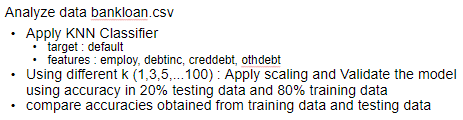

In [2]:
#1. Input dataset

bankloan = pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [3]:
#2. Menentukan variabel dependen dan independen

fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

X = bankloan[fitur]
y = bankloan[target]

In [4]:
X.columns

Index(['employ', 'debtinc', 'creddebt', 'othdebt'], dtype='object')

In [5]:
#3. Data Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=2021)

In [6]:
#4. Melakukan feature scalling

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#5. Selection process of Factor K


k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn_ = KNeighborsClassifier(n_neighbors=i)
    knn_.fit(X_train_scaled, y_train)
    
    y_predict_train = knn_.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = knn_.predict(X_test_scaled)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))
    
    acc_score = accuracy_score(y_test, y_predict_test)
    
    if score <= acc_score:
        score = acc_score
        best_k = i

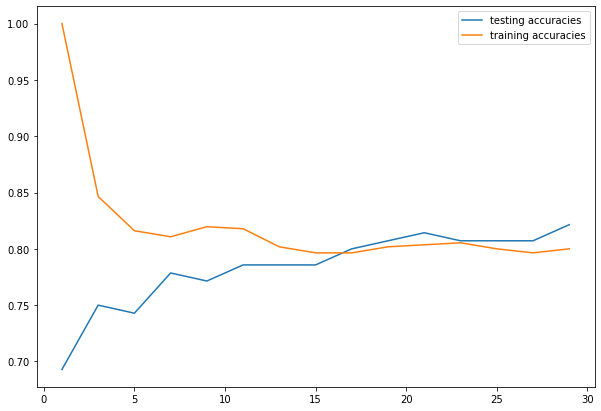

In [8]:
#7. #membuat plot untuk melihat hasil diatas

plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies, markers=training_accuracies)
sns.lineplot(k, training_accuracies, markers=training_accuracies)
plt.legend(['testing accuracies', 'training accuracies'])
plt.show()

In [9]:
#melihat kelas terbaik dan score terbaik

print('best k:', best_k)
print('accuracy:', score)

best k: 29
accuracy: 0.8214285714285714


1. The best factor k for this case is 29 with 82.43 % accuracy
1. For k = 1, the KNN method achieve 100 accuracy in training set but very bad accuracy in test set
1. For k below 31, The ML method is getting overfitting while for k greater than 31 the ML method is getting underfitting

# __2. Model Complexity : Decision Tree__

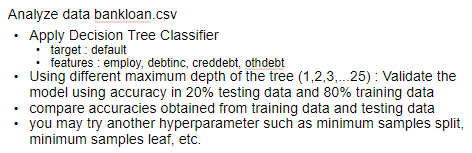

In [10]:
#Selection Process of Maximum Depth

#dt ==> gapake scalling

depths = range(1,26)
testing_accuracies = []
training_accuracies = []
score = 0

for i in depths:
    dtc_ = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=2021)
    dtc_.fit(X_train, y_train)
    
    y_predict_train = dtc_.predict(X_train)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = dtc_.predict(X_test)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))
    
    acc_score = accuracy_score(y_test, y_predict_test)
    
    if score < acc_score:
        score = acc_score
        best_depth = i

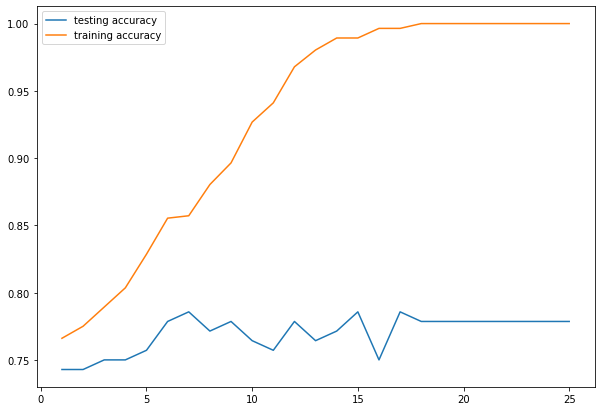

In [11]:
#membuat plot untuk melihat hasil diatas

plt.figure(figsize=(10,7))
sns.lineplot(depths, testing_accuracies)
sns.lineplot(depths, training_accuracies)
plt.legend(['testing accuracy', 'training accuracy'])
plt.show()

In [12]:
#melihat kelas terbaik dan score terbaik

print('best max depth:', best_depth)
print('accuracy:', score)

best max depth: 7
accuracy: 0.7857142857142857


In [13]:
#mengecek train dan test accuracy

dict(zip(list(range(1,26)),list(zip(training_accuracies, testing_accuracies))))

{1: (0.7660714285714286, 0.7428571428571429),
 2: (0.775, 0.7428571428571429),
 3: (0.7892857142857143, 0.75),
 4: (0.8035714285714286, 0.75),
 5: (0.8285714285714286, 0.7571428571428571),
 6: (0.8553571428571428, 0.7785714285714286),
 7: (0.8571428571428571, 0.7857142857142857),
 8: (0.8803571428571428, 0.7714285714285715),
 9: (0.8964285714285715, 0.7785714285714286),
 10: (0.9267857142857143, 0.7642857142857142),
 11: (0.9410714285714286, 0.7571428571428571),
 12: (0.9678571428571429, 0.7785714285714286),
 13: (0.9803571428571428, 0.7642857142857142),
 14: (0.9892857142857143, 0.7714285714285715),
 15: (0.9892857142857143, 0.7857142857142857),
 16: (0.9964285714285714, 0.75),
 17: (0.9964285714285714, 0.7857142857142857),
 18: (1.0, 0.7785714285714286),
 19: (1.0, 0.7785714285714286),
 20: (1.0, 0.7785714285714286),
 21: (1.0, 0.7785714285714286),
 22: (1.0, 0.7785714285714286),
 23: (1.0, 0.7785714285714286),
 24: (1.0, 0.7785714285714286),
 25: (1.0, 0.7785714285714286)}

> ## Exercise : Try different value of minimum samples split or minimum samples leaf

02.31 -- ke enam

## __Model Complexity : Linear Model Regression__

In [14]:
#1. Load dataset

boston = load_boston()

In [15]:
#mengecek keys di dataset

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [16]:
#melihat description yg ditersedia di dataset

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [17]:
#2. Menentukan variabel dependen dan independent

X = pd.DataFrame(data=boston['data'], columns = boston['feature_names'])
y = pd.Series(boston['target'])

display(X.head())
display(y.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [18]:
#3. Melakukan data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1899)

In [19]:
# mengecek parameter yg ada di Ridge

Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [20]:
#4. Membuat model, melakukan predict, dan model performance dengan itter alpha

alphas = [100000, 10000, 1000, 100, 10, 1, .1, .001]
testing_mse = []
training_mse = []
score = 0

for i in alphas:
    ridge_ = Ridge(alpha = i)
    ridge_.fit(X_train, y_train)
    
    y_predict_train = ridge_.predict(X_train)
    training_mse.append(mean_squared_error(y_train, y_predict_train))
    
    y_predict_test = ridge_.predict(X_test)
    testing_mse.append(mean_squared_error(y_test, y_predict_test))
    mse_score = mean_squared_error(y_test, y_predict_test)
    
    if score < mse_score:
        score = mse_score
        best_c = i

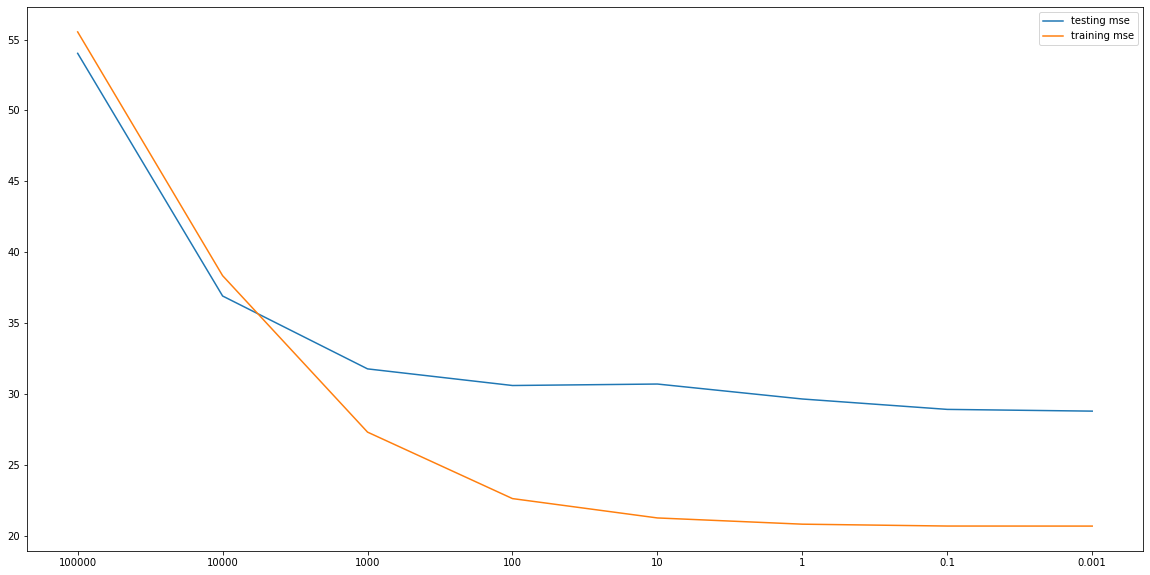

In [21]:
#5. Membuat plot untuk melihat hasil diatas

length = range(len(alphas))

plt.figure(figsize=(20,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['testing mse', 'training mse'])
plt.xticks(length, alphas)
plt.show()

In [22]:
#6. Melihat best alpha dan score mse

print('best alpha:', best_c) #best alphanya ketika mse bernilai paling kecil
print('mse:', score) #semakin besar mse, semakin jelek

best alpha: 100000
mse: 54.03257553867469


## __How it works?__

> #### __Membuktikan secara manual dengan data yg lebih sederhana__

In [23]:
#1. Membuat data sederhana

np.random.seed = 1
data = {
    'x': np.arange(10),
    'y': np.arange(10)+np.random.randn(10)
}

df = pd.DataFrame(data)
df

,x,y
0,0,1.251942
1,1,0.220049
2,2,3.708833
3,3,4.065765
4,4,4.162326
5,5,3.406574
6,6,4.286065
7,7,6.671264
8,8,6.703544
9,9,8.975773


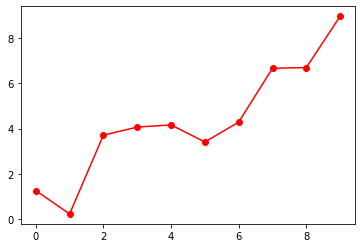

In [24]:
#2. Memvisualisasikan dengan plot

plt.plot(df['x'], df['y'], 'ro-')
plt.show()

In [25]:
#3. Melakukan data splitting (train 80: test 20)

Xtr, Xts, ytr, yts = train_test_split(df[['x']], df['y'], test_size=0.2, random_state=1)

In [26]:
#4. Membuat model

lr8020 = LinearRegression()
lr8020.fit(Xtr, ytr)

LinearRegression()

In [27]:
#5. Melakukan prediksi dan dibuat dalam tabel

df['pred_8020'] = lr8020.predict(df[['x']])
df

,x,y,pred_8020
0,0,1.251942,0.677117
1,1,0.220049,1.422723
2,2,3.708833,2.168329
3,3,4.065765,2.913934
4,4,4.162326,3.659540
5,5,3.406574,4.405145
6,6,4.286065,5.150751
7,7,6.671264,5.896356
8,8,6.703544,6.641962
9,9,8.975773,7.387567


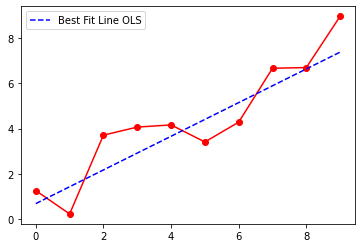

In [28]:
#6. Melakukan plotting dengan data prediksi

plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['pred_8020'], 'b--', label='Best Fit Line OLS')
plt.legend()
plt.show()

> #### __Linear regression dengan data yg lebih sederhana (overfitting)__

In [29]:
#1. Membuat model dengan 2 data pertama saja

lr2 = LinearRegression()
lr2.fit(df[['x']].iloc[:2], df['y'][:2])

LinearRegression()

In [30]:
#2. Melakukan prediksi

df['pred_2'] = lr2.predict(df[['x']])
df

,x,y,pred_8020,pred_2
0,0,1.251942,0.677117,1.251942
1,1,0.220049,1.422723,0.220049
2,2,3.708833,2.168329,-0.811845
3,3,4.065765,2.913934,-1.843738
4,4,4.162326,3.659540,-2.875632
5,5,3.406574,4.405145,-3.907525
6,6,4.286065,5.150751,-4.939419
7,7,6.671264,5.896356,-5.971313
8,8,6.703544,6.641962,-7.003206
9,9,8.975773,7.387567,-8.035100


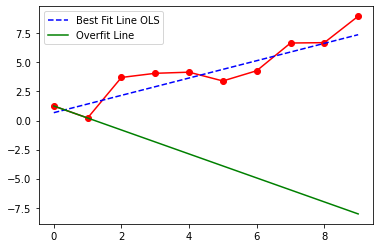

In [31]:
#3. Memvisualisasikan dengan plot

plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['pred_8020'], 'b--', label='Best Fit Line OLS')
plt.plot(df['x'], df['pred_2'], 'g-', label='Overfit Line')
plt.legend()
plt.show()

> #### __Ridge dengan data yg lebih sederhana (overfitting)__

In [32]:
#1. Mmebuat model dengan ridge

ridge = Ridge(alpha=1.7) #alpha =! 0
ridge.fit(df[['x']].iloc[:2], df['y'][:2])

Ridge(alpha=1.7)

In [33]:
#2. Membuat prediksi di dalam tabel

df['pred_ridge'] = ridge.predict(df[['x']])

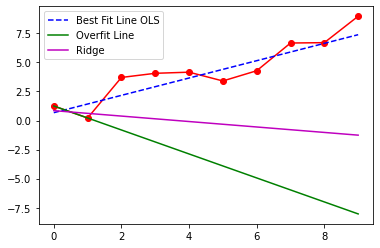

In [34]:
#3. Memvisualisasikan hasil diatas

plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['pred_8020'], 'b--', label='Best Fit Line OLS')
plt.plot(df['x'], df['pred_2'], 'g-', label='Overfit Line')
plt.plot(df['x'], df['pred_ridge'], 'm-', label='Ridge')
plt.legend()

plt.show()

In [35]:
#4. Membandingkan nilai mse pada train set dengan prediksi dengan ridge dan tanpa ridge

mse_train_2_ols = mean_squared_error(df['y'][:2], df['pred_2'][:2])
mse_train_2_ridge = mean_squared_error(df['y'][:2], df['pred_ridge'][:2])

print(mse_train_2_ols)
print(mse_train_2_ridge)

3.0814879110195774e-32
0.15895065121054236


In [36]:
#4. Membandingkan nilai mse pada train set dengan prediksi dengan ridge dan tanpa ridge

mse_test_2_ols = mean_squared_error(df['y'][2:], df['pred_2'][2:])
mse_test_2_ridge = mean_squared_error(df['y'][2:], df['pred_ridge'][2:])

print(mse_test_2_ols)
print(mse_test_2_ridge)

110.07209311522902
37.724713421983964
